# Evaluating the Scores

In [1]:
import pandas as pd
import numpy as np
import os
import cleanup as cl
import seaborn as sns
%load_ext autoreload
%autoreload 2

df_questions_table = pd.read_csv('data/questions.csv')
df_prompted_table = pd.read_csv('data/prompted.csv', low_memory=False)
df_unprompted_table = pd.read_csv('data/unprompted.csv',low_memory=False)
df_no_assistance_table = pd.read_csv('data/noassistance.csv',low_memory=False)
df_feedback_ques = pd.read_csv('data/feedback.csv',low_memory=False)
df_feedback_ans = pd.read_csv('data/feedbackans.csv',low_memory=False)
user_data_df = pd.read_csv('data/users.csv')

In [2]:
low=60; high =1500
prompted_df = cl.cleanup_data(df_prompted_table, low, high)
unprompted_df = cl.cleanup_data(df_unprompted_table, low, high)
no_as_df = cl.cleanup_data(df_no_assistance_table, low, high)


In [3]:
prompted_df

,id,user,action,page,time,date,date_diff,score
12,15537.0,175018,A,1,09:48:17,2024-05-07 09:48:24.332271+05:30,0 days 00:00:00,1
13,15539.0,175018,D,2,09:48:26,2024-05-07 09:48:36.807198+05:30,0 days 00:00:12.474927,0
14,15541.0,175018,D,3,09:48:37,2024-05-07 09:48:42.706785+05:30,0 days 00:00:05.899587,1
15,15543.0,175018,D,4,09:48:43,2024-05-07 09:48:48.106587+05:30,0 days 00:00:05.399802,1
16,15545.0,175018,D,5,09:48:48,2024-05-07 09:48:54.892133+05:30,0 days 00:00:06.785546,1
...,...,...,...,...,...,...,...,...
919,14636.0,test,D,10,15:37:37,2024-05-02 15:37:37.906470+05:30,0 days 00:00:02.828881,0
920,14638.0,test,C,11,15:37:40,2024-05-02 15:37:41.229249+05:30,0 days 00:00:03.322779,1
921,14640.0,test,B,12,15:37:45,2024-05-02 15:37:47.060331+05:30,0 days 00:00:05.831082,1
922,14644.0,test,B,1,15:42:40,2024-05-02 15:43:33.680688+05:30,0 days 00:05:46.620357,0


In [4]:
unprompted_df

,id,user,action,page,time,date,date_diff,score
0,16238.0,088,B,1,18:41:14,2024-05-08 18:40:50.299848+05:30,0 days 00:00:00,0
1,16253.0,088,B,2,18:41:40,2024-05-08 18:41:19.025516+05:30,0 days 00:00:28.725668,0
2,16320.0,088,D,3,18:42:05,2024-05-08 18:43:16.764968+05:30,0 days 00:01:57.739452,1
3,16394.0,088,D,4,18:44:28,2024-05-08 18:45:08.824473+05:30,0 days 00:01:52.059505,1
4,16412.0,088,D,5,18:45:54,2024-05-08 18:45:30.916865+05:30,0 days 00:00:22.092392,1
...,...,...,...,...,...,...,...,...
1133,14668.0,vicky,A,8,12:00:40,2024-05-03 12:00:50.369947+05:30,0 days 00:00:11.068194,0
1134,14670.0,vicky,A,9,12:00:51,2024-05-03 12:01:06.039901+05:30,0 days 00:00:15.669954,0
1135,14672.0,vicky,C,10,12:01:08,2024-05-03 12:01:38.554830+05:30,0 days 00:00:32.514929,1
1136,14674.0,vicky,C,11,12:01:44,2024-05-03 12:01:58.320139+05:30,0 days 00:00:19.765309,1


In [5]:
no_as_df

,id,user,action,page,time,date,date_diff,score
0,11850,12220919,B,1,17:55:32,2024-05-04 17:55:45.728929+05:30,0 days 00:00:00,0
1,11854,12220919,C,2,17:55:49,2024-05-04 17:56:26.867639+05:30,0 days 00:00:41.138710,1
2,11856,12220919,D,3,17:56:27,2024-05-04 17:56:58.990856+05:30,0 days 00:00:32.123217,1
3,11860,12220919,B,4,17:57:00,2024-05-04 17:58:02.296098+05:30,0 days 00:01:03.305242,0
4,11862,12220919,B,5,17:58:03,2024-05-04 17:58:17.628693+05:30,0 days 00:00:15.332595,0
...,...,...,...,...,...,...,...,...
1075,13040,senthl,C,8,13:20:55,2024-05-07 13:21:03.063266+05:30,0 days 00:00:04.649613,0
1076,13042,senthl,B,9,13:20:59,2024-05-07 13:21:05.773575+05:30,0 days 00:00:02.710309,0
1077,13044,senthl,D,10,13:21:02,2024-05-07 13:21:08.448087+05:30,0 days 00:00:02.674512,0
1078,13046,senthl,D,11,13:21:04,2024-05-07 13:21:10.823473+05:30,0 days 00:00:02.375386,0


In [6]:
# prompted_df.to_csv('new_new_prompted_filtered_scores.csv')

In [7]:
# unprompted_df.to_csv('unprompted_filtered_scores.csv')

## Total Score

prompted df 69
unprompted df 90
no as df 79

F-statistic: 3.697919519882509
p-value: 0.02622813809105422

Means of the score
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1    group2   meandiff p-adj   lower   upper  reject
----------------------------------------------------------
   no_as   prompted   -0.929 0.2139 -2.2311  0.3731  False
   no_as unprompted  -1.3899 0.0208 -2.6082 -0.1715   True
prompted unprompted  -0.4609 0.6662 -1.7253  0.8036  False
----------------------------------------------------------


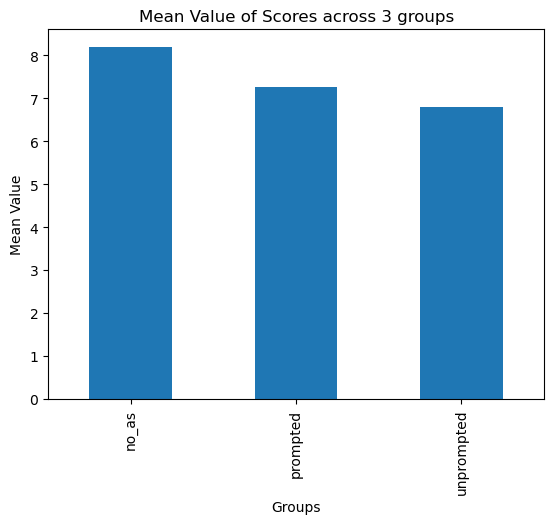

In [8]:
cl.stats(no_as_df, prompted_df, unprompted_df)


## Strtify the data between CRT and Maths

In [9]:
prompted_crt, prompted_math = cl.stratify(prompted_df)
unprompted_crt, unprompted_math = cl.stratify(unprompted_df)
no_as_crt, no_as_math = cl.stratify(no_as_df)

prompted df 69
unprompted df 90
no as df 79

F-statistic: 1.402077735967276
p-value: 0.2481359514377582

Means of the score
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1    group2   meandiff p-adj   lower  upper  reject
---------------------------------------------------------
   no_as   prompted  -0.4713  0.455 -1.3985 0.4559  False
   no_as unprompted  -0.5925  0.243 -1.4601  0.275  False
prompted unprompted  -0.1213 0.9459 -1.0216 0.7791  False
---------------------------------------------------------


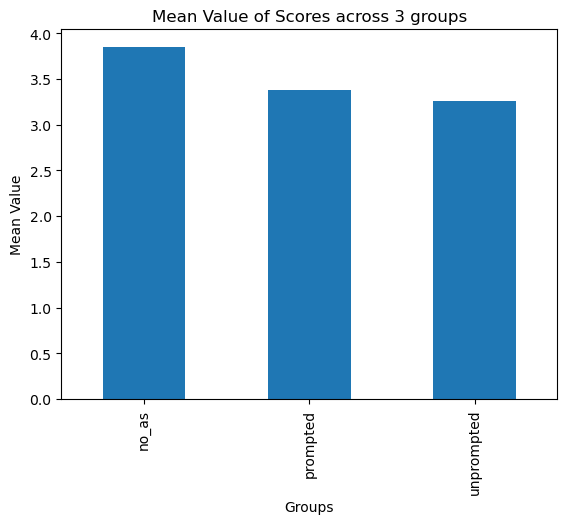

In [10]:
cl.stats(no_as_crt, prompted_crt, unprompted_crt)

prompted df 69
unprompted df 90
no as df 79

F-statistic: 6.088841622280295
p-value: 0.0026417157062147405

Means of the score
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1    group2   meandiff p-adj   lower   upper  reject
----------------------------------------------------------
   no_as   prompted  -0.4577  0.149 -1.0343  0.1188  False
   no_as unprompted  -0.7973 0.0017 -1.3368 -0.2579   True
prompted unprompted  -0.3396 0.3268 -0.8995  0.2203  False
----------------------------------------------------------


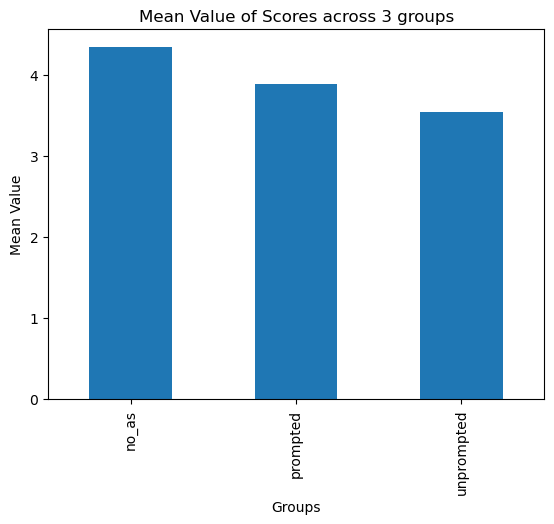

In [11]:
cl.stats(no_as_math, prompted_math, unprompted_math)

## More analysis for Math questions:

In [12]:
no_as_math_count = cl.stats_for_math(no_as_math)
prompted_math_count = cl.stats_for_math(prompted_math)
unprompted_math_count = cl.stats_for_math(unprompted_math)

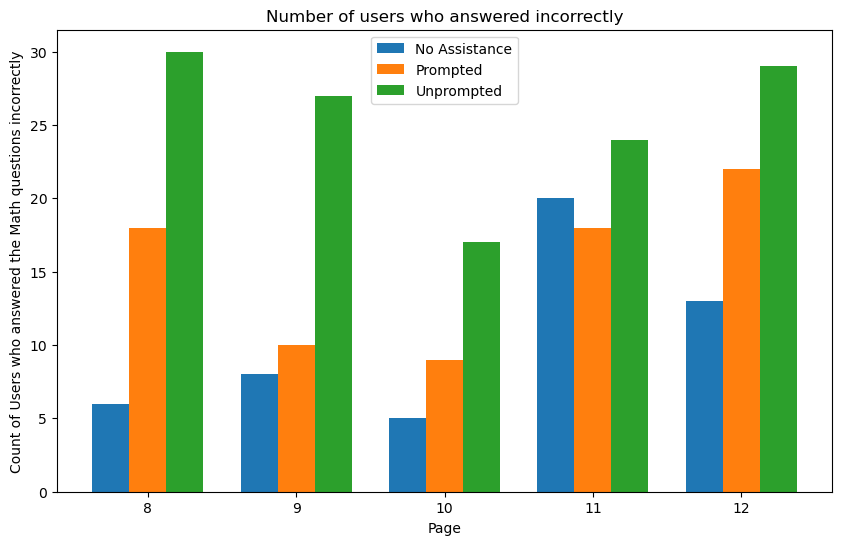

In [13]:
cl.plot_for_incorrect_math(no_as_math_count, prompted_math_count, unprompted_math_count)

prompted df 69
unprompted df 90
no as df 79

no assistance mean: 4.341772151898734
prompted mean: 3.8840579710144927
unprompted mean: 3.5444444444444443



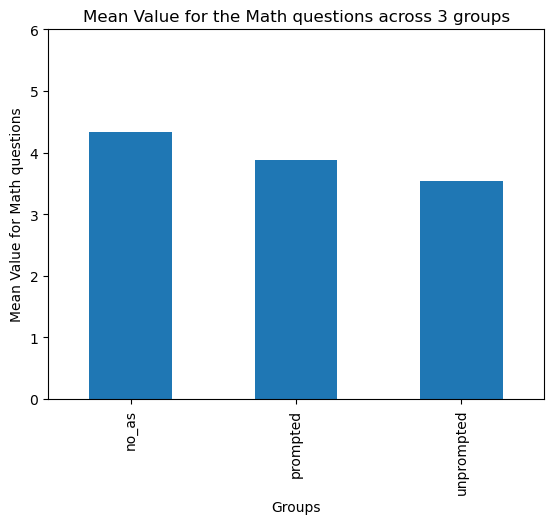

In [14]:
cl.math_mean_score(no_as_math, prompted_math, unprompted_math)

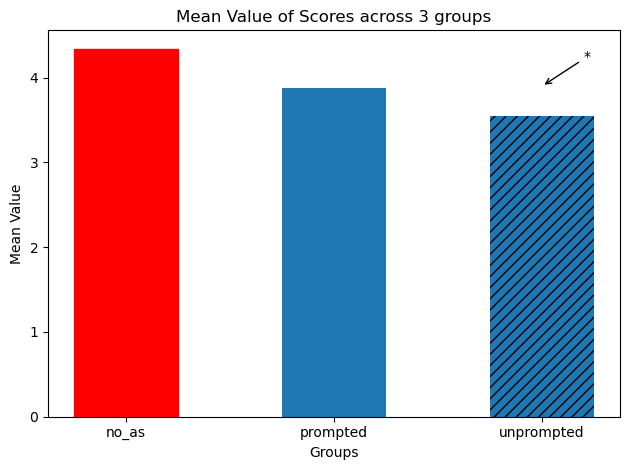

In [15]:
cl.plot_showing_significance()

# Time Analysis

Combine all the datasets together.


In [16]:
unprompted_math

,id,user,action,page,time,date,date_diff,score
7,16478.0,088,B,8,18:48:07,2024-05-08 18:47:58.697417+05:30,0 days 00:00:39.190096,1
8,16490.0,088,C,9,18:48:51,2024-05-08 18:48:18.742661+05:30,0 days 00:00:20.045244,1
9,16508.0,088,C,10,18:49:12,2024-05-08 18:48:57.694904+05:30,0 days 00:00:38.952243,1
10,16531.0,088,C,11,18:49:44,2024-05-08 18:49:52.720222+05:30,0 days 00:00:55.025318,1
11,16540.0,088,B,12,18:50:39,2024-05-08 18:50:23.888334+05:30,0 days 00:00:31.168112,1
...,...,...,...,...,...,...,...,...
1133,14668.0,vicky,A,8,12:00:40,2024-05-03 12:00:50.369947+05:30,0 days 00:00:11.068194,0
1134,14670.0,vicky,A,9,12:00:51,2024-05-03 12:01:06.039901+05:30,0 days 00:00:15.669954,0
1135,14672.0,vicky,C,10,12:01:08,2024-05-03 12:01:38.554830+05:30,0 days 00:00:32.514929,1
1136,14674.0,vicky,C,11,12:01:44,2024-05-03 12:01:58.320139+05:30,0 days 00:00:19.765309,1


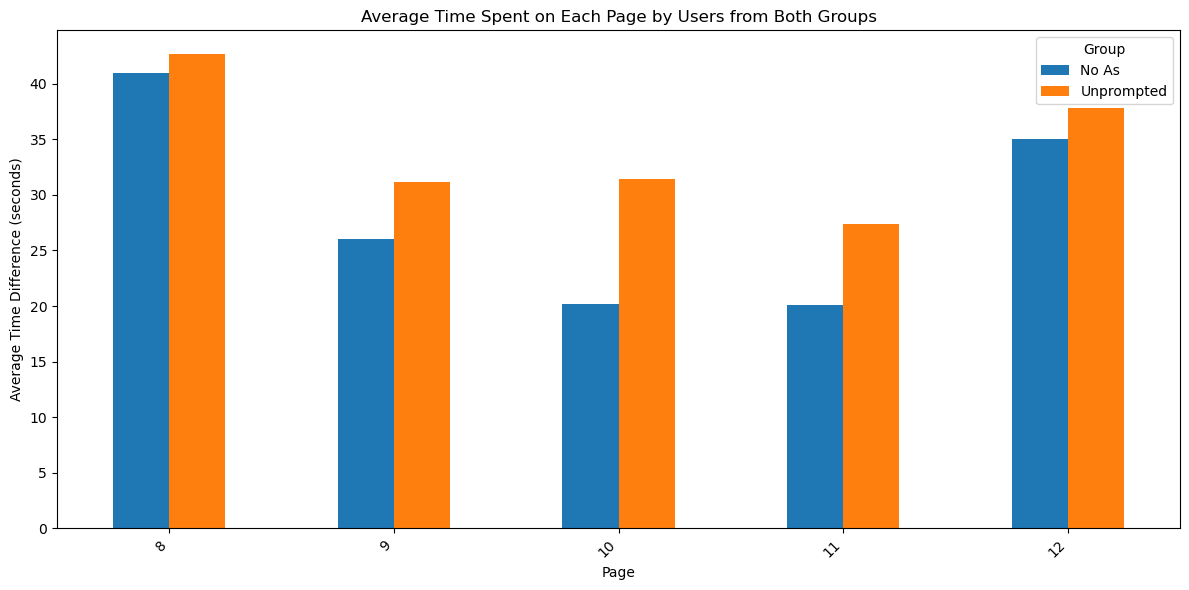

In [17]:
import matplotlib.pyplot as plt

no_as_math_new = no_as_math.copy()
unprompted_math_new = unprompted_math.copy()

# Ensure 'date_diff' is in timedelta format and convert to seconds
no_as_math_new['date_diff_seconds'] = no_as_math_new['date_diff'].dt.total_seconds()
unprompted_math_new['date_diff_seconds'] = unprompted_math_new['date_diff'].dt.total_seconds()

# Add a column to distinguish between the two groups
no_as_math_new['group'] = 'No As'
unprompted_math_new['group'] = 'Unprompted'

# Combine the two DataFrames
combined_df = pd.concat([no_as_math_new, unprompted_math_new])

# Group the data by page and group, then calculate the mean date_diff_seconds
grouped = combined_df.groupby(['page', 'group'])['date_diff_seconds'].mean().reset_index()

# Pivot the table for plotting
pivot_table = grouped.pivot(index='page', columns='group', values='date_diff_seconds')

# Plot the data
pivot_table.plot(kind='bar', figsize=(12, 6))

# Set plot title and labels
plt.title('Average Time Spent on Each Page by Users from Both Groups')
plt.xlabel('Page')
plt.ylabel('Average Time Difference (seconds)')
plt.legend(title='Group')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

# TODO
* Remove people who were too fast ( <1 minutes?) - decided on less than 1 minute and more than 25  - DONE
* calculate scores - DONE
* Stratify by CRT and Math and re-run tests - DONE
* Look at apple math question and see who gets it wrong - DONE MANUALLy and DISCUSSED
* Time analysis - DONE
* Average mean for math questions
* Plot for basic math question to show number of people who anserred incorrectly for three groups - DONE


In [ ]:
## combine the df's together to get a single df
combined_df = pd.concat([prompted_df, unprompted_df, no_as_df], axis=0)
combined_df.shape

In [ ]:
# filter out people who didn't spend enough time on the quiz
# I need to do a groupby on the user id, and then calculate their times, then I can filter.

times = combined_df.groupby('user')['date_diff'].sum()
tt = times.astype(np.int64) // 10**9 # convert to seconds
tt.hist(bins=100)

In [ ]:
sns.boxplot(tt[tt<1500][tt >60])


In [ ]:
tt[tt<1500][tt >60].describe()

In [ ]:
25*60

# Score Analysis

In [ ]:
# so I can drop, time, date, date_diff, id for this analysis.
no_as_df_sa =no_as_df.drop(['time', 'date', 'date_diff', 'id'], axis=1)

## Now I need to create a new column that gives a 1 if their score is correct and a 0 if it's wrong
# Correct answers are in the correct_answers_mapped list, which are listed by index according to page numbers


In [ ]:
unprompted_df['page'].value_counts()

In [ ]:
prompted_df['page'].value_counts()

In [ ]:
no_as_df['page'].value_counts()

In [ ]:
prompted_df = cl.extract_correct_score(prompted_df)
unprompted_df = cl.extract_correct_score(df_unprompted_table)
no_as_df = cl.extract_correct_score(df_no_assistance_table)


## Mapping the Actions of each user into a dictionary

In [ ]:
prompted_action_user_mapping = {}

for index, row in prompted_filtered_df.iterrows():
    user = row['user']
    action = row['action']
    
    # Check if the user is already in the dictionary
    if user in prompted_action_user_mapping:
        # If user is already in dictionary, append the current action to the existing list for that user
        prompted_action_user_mapping[user].append(action)
    else:
        # If the user is not in the dictionary, create a new entry with the action as a list
        prompted_action_user_mapping[user] = [action]


## Filtering/ Removing the all other Actions and storing only the last selected options by the user

In [ ]:
prompted_options_before_continue = {}

for user, actions in prompted_action_user_mapping.items():
    options = []
    last_option = None  # This will track the most recent valid option before 'Continue'

    for idx, action in enumerate(actions):
       if action == 'Start':
            start_encountered = True
            options = []  # Reset options list when 'Start' action is encountered
       elif action == 'Continue' or action == 'End':
            if last_option is not None:
                options.append(last_option)
                last_option = None  # Reset last_option after appending it
       elif action not in ['Start', 'Continue', 'End', 'Prompt']:
            last_option = action
    
    prompted_options_before_continue[user] = options


## Comparing results

In [ ]:
prompted_options_before_continue

In [ ]:
prompted_comparison_results_by_user = {}

for user, actions in prompted_options_before_continue.items():
    user_comparison_results = []

    for action in actions:
        # add 1 if answer is correct, otherwise add 0 to the list
        if action in correct_answers_mapped:
            action_index = actions.index(action)
            correct_answer_at_index = correct_answers_mapped[action_index] if action_index < len(correct_answers_mapped) else None
            user_comparison_results.append(1 if action == correct_answer_at_index else 0)
        else:
            user_comparison_results.append(0)

    prompted_comparison_results_by_user[user] = user_comparison_results

prompted_comparison_results_by_user

## Sum of Scores of each user

In [ ]:
# sum of compared results for each user
prompted_sum_of_results_by_user = {}

for user, results in prompted_comparison_results_by_user.items():
    crt_score = sum(results[:7])  # Sum of first 7 items for CRT
    basic_math_score = sum(results[7:])  # Sum of remaining items for Basic Math
    total_score = sum(results)  # Sum of all items for Total
    prompted_sum_of_results_by_user[user] = {'CRT': crt_score, 'Basic Math': basic_math_score, 'Score': total_score}

prompted_sum_of_results_by_user

In [ ]:
len(prompted_sum_of_results_by_user)

Exporting the user_id and score to a CSV/Excel

In [ ]:
df = pd.DataFrame.from_dict(prompted_sum_of_results_by_user, orient='index').reset_index()
df.rename(columns={'index': 'Roll Number'}, inplace=True)

# Export to Excel
df.to_excel('prompted_scores.xlsx', index=False)

# Export to CSV
df.to_csv('prompted_scores.csv', index=False)

# Unprompted Analysis

In [ ]:
# unprompted table
df_unprompted_table.head(n=41)
main_columns= ['id', 'user', 'action', 'page','time', 'date']
df_unprompted_table_1 = df_unprompted_table[main_columns]
df_unprompted_table_1

In [ ]:
unprompted_grouped_df = df_unprompted_table_1.groupby('user')
# grouped_df.head()
unprompted_rearranged_df = unprompted_grouped_df.apply(lambda x: x.sort_values(['date', 'time']))
unprompted_final_df = unprompted_rearranged_df.reset_index(level=1, drop=True)

In [ ]:
unprompted_final_df['date'] = pd.to_datetime(unprompted_final_df['date'])

start_date = pd.Timestamp('2024-04-12').date()
end_date = pd.Timestamp.today().date()
unprompted_filtered_df = unprompted_final_df[(unprompted_final_df['date'].dt.date >= start_date) & 
                                         (unprompted_final_df['date'].dt.date <= end_date)]
# Optionally, you can reset the index
unprompted_filtered_df = unprompted_filtered_df.reset_index(drop=True)
unprompted_filtered_df

In [ ]:
unprompted_sorted_df = unprompted_filtered_df.sort_values(['user', 'date'])

# Group the DataFrame by 'user' and calculate the datetime difference
date_diff = unprompted_sorted_df.groupby('user')['date'].diff()

# Fill the first NaN value with the initial datetime
date_diff = date_diff.fillna(pd.Timedelta(0))

# Assign the date difference to a new column in the original DataFrame
unprompted_filtered_df['date_diff'] = date_diff
unprompted_filtered_df


## Mapping the Actions of each user into a dictionary

In [ ]:
unprompted_action_user_mapping = {}

for index, row in unprompted_filtered_df.iterrows():
    user = row['user']
    action = row['action']
    
    # Check if the user is already in the dictionary
    if user in unprompted_action_user_mapping:
        # If user is already in dictionary, append the current action to the existing list for that user
        unprompted_action_user_mapping[user].append(action)
    else:
        # If the user is not in the dictionary, create a new entry with the action as a list
        unprompted_action_user_mapping[user] = [action]


## Filtering/ Removing the all other Actions and storing only the last selected options by the user

In [ ]:
unprompted_options_before_continue = {}

for user, actions in unprompted_action_user_mapping.items():
    options = []
    last_option = None  # This will track the most recent valid option before 'Continue'
    start_encountered = False  # Flag to track if 'Start' action has been encountered
    
    for idx, action in enumerate(actions):
        if action == 'Start':
            start_encountered = True
            options = []  # Reset options list when 'Start' action is encountered
        elif action == 'Continue' or action == 'End':
            if last_option is not None:
                options.append(last_option)
                last_option = None  # Reset last_option after appending it
        elif action not in ['Start', 'Continue', 'End']:
            last_option = action
    
            unprompted_options_before_continue[user] = options


## Comparing Results

In [ ]:
unprompted_comparison_results_by_user = {}

for user, actions in unprompted_options_before_continue.items():
    user_comparison_results = []

    for action in actions:
        # add 1 if answer is correct, otherwise add 0 to the list
        if action in correct_answers_mapped:
            action_index = actions.index(action)
            correct_answer_at_index = correct_answers_mapped[action_index] if action_index < len(correct_answers_mapped) else None
            user_comparison_results.append(1 if action == correct_answer_at_index else 0)
        else:
            user_comparison_results.append(0)

    unprompted_comparison_results_by_user[user] = user_comparison_results



# Sum of Scores of each user

In [ ]:
# sum of compared results for each user
unprompted_sum_of_results_by_user = {}

for user, results in unprompted_comparison_results_by_user.items():
    crt_score = sum(results[:7])  # Sum of first 7 items for CRT
    basic_math_score = sum(results[7:])  # Sum of remaining items for Basic Math
    total_score = sum(results)  # Sum of all items for Total
    unprompted_sum_of_results_by_user[user] = {'CRT': crt_score, 'Basic Math': basic_math_score, 'Score': total_score}

unprompted_sum_of_results_by_user

In [ ]:
len(unprompted_sum_of_results_by_user)

## Exporting the user_id and score to a CSV/Excel

In [ ]:
import pandas as pd

df = pd.DataFrame.from_dict(unprompted_sum_of_results_by_user, orient='index').reset_index()
df.rename(columns={'index': 'Roll Number'}, inplace=True)

# excel
df.to_excel('unprompted_scores.xlsx', index=False)
#csv
df.to_csv('unprompted_scores.csv', index=False)

# No Assistance

In [ ]:
# no assistance table
df_no_assistance_table.head(n=41)
main_columns= ['id', 'user', 'action', 'page','time', 'date']
df_no_assistance_table_1 = df_no_assistance_table[main_columns]
df_no_assistance_table_1

In [ ]:
no_assistance_grouped_df = df_no_assistance_table_1.groupby('user')
# grouped_df.head()
no_assistance_rearranged_df = no_assistance_grouped_df.apply(lambda x: x.sort_values(['date', 'time']))
no_assistance_final_df = no_assistance_rearranged_df.reset_index(level=1, drop=True)


In [ ]:
no_assistance_final_df['date'] = pd.to_datetime(no_assistance_final_df['date'])

start_date = pd.Timestamp('2024-04-12').date()
end_date = pd.Timestamp.today().date()
no_assistance_filtered_df = no_assistance_final_df[(no_assistance_final_df['date'].dt.date >= start_date) & 
                                         (no_assistance_final_df['date'].dt.date <= end_date)]
# Optionally, you can reset the index
no_assistance_filtered_df = no_assistance_filtered_df.reset_index(drop=True)

In [ ]:
no_assistance_sorted_df = no_assistance_filtered_df.sort_values(['user', 'date'])

# Group the DataFrame by 'user' and calculate the datetime difference
date_diff = no_assistance_sorted_df.groupby('user')['date'].diff()

# Fill the first NaN value with the initial datetime
date_diff = date_diff.fillna(pd.Timedelta(0))

# Assign the date difference to a new column in the original DataFrame
no_assistance_filtered_df['date_diff'] = date_diff
no_assistance_filtered_df

## Mapping the Actions of each user into a dictionary

In [ ]:
no_assistance_action_user_mapping = {}

for index, row in no_assistance_filtered_df.iterrows():
    user = row['user']
    action = row['action']
    
    # Check if the user is already in the dictionary
    if user in no_assistance_action_user_mapping:
        # If user is already in dictionary, append the current action to the existing list for that user
        no_assistance_action_user_mapping[user].append(action)
    else:
        # If the user is not in the dictionary, create a new entry with the action as a list
        no_assistance_action_user_mapping[user] = [action]



## Filtering/ Removing the all other Actions and storing only the last selected options by the user

In [ ]:
no_assistance_options_before_continue = {}

for user, actions in no_assistance_action_user_mapping.items():
    options = []
    last_option = None  # This will track the most recent valid option before 'Continue'

    for idx, action in enumerate(actions):
        if action == 'Start':
            start_encountered = True
            options = []  # Reset options list when 'Start' action is encountered
        elif action == 'Continue' or action == 'End':
            if last_option is not None:
                options.append(last_option)
                last_option = None  # Reset last_option after appending it
        elif action not in ['Start', 'Continue', 'End']:
            last_option = action
    
    no_assistance_options_before_continue[user] = options



In [ ]:
no_assistance_comparison_results_by_user = {}

for user, actions in no_assistance_options_before_continue.items():
    user_comparison_results = []

    for action in actions:
        # add 1 if answer is correct, otherwise add 0 to the list
        if action in correct_answers_mapped:
            action_index = actions.index(action)
            correct_answer_at_index = correct_answers_mapped[action_index] if action_index < len(correct_answers_mapped) else None
            user_comparison_results.append(1 if action == correct_answer_at_index else 0)
        else:
            user_comparison_results.append(0)

    no_assistance_comparison_results_by_user[user] = user_comparison_results



## Sum of Scores of each user

In [ ]:

# sum of compared results for each user
no_assistance_sum_of_results_by_user = {}

for user, results in no_assistance_comparison_results_by_user.items():
    crt_score = sum(results[:7])  # Sum of first 7 items for CRT
    basic_math_score = sum(results[7:])  # Sum of remaining items for Basic Math
    total_score = sum(results)  # Sum of all items for Total
    no_assistance_sum_of_results_by_user[user] = {'CRT': crt_score, 'Basic Math': basic_math_score, 'Score': total_score}

no_assistance_sum_of_results_by_user

In [ ]:
len(no_assistance_sum_of_results_by_user)

Exporting the user_id and score to a CSV/Excel

In [ ]:
import pandas as pd

df = pd.DataFrame.from_dict(no_assistance_sum_of_results_by_user, orient='index').reset_index()
df.rename(columns={'index': 'Roll Number'}, inplace=True)

# excel
df.to_excel('no_assistance_scores.xlsx', index=False)
#csv
df.to_csv('no_assistance_scores.csv', index=False)

## Plots

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

prompted_score_df = pd.read_csv('prompted_scores.csv')
unprompted_score_df = pd.read_csv('unprompted_scores.csv')
no_assistance_score_df = pd.read_csv('no_assistance_scores.csv')

## CRT Score

In [ ]:
unprompted_counts = unprompted_score_df['CRT'].value_counts().sort_index()
prompted_counts = prompted_score_df['CRT'].value_counts().sort_index()
no_assistance_counts = no_assistance_score_df['CRT'].value_counts().sort_index()

# Get the maximum CRT score for setting x-axis limits
max_crt_score = max(unprompted_score_df['CRT'].max(), prompted_score_df['CRT'].max(), no_assistance_score_df['CRT'].max())

# Get a sorted array of all unique CRT scores present in the data from all groups
unique_scores = sorted(set(unprompted_score_df['CRT']) | set(prompted_score_df['CRT']) | set(no_assistance_score_df['CRT']))

# Map the counts to the unique_scores, filling missing values with 0
unprompted_mapped_counts = unprompted_counts.reindex(unique_scores, fill_value=0)
prompted_mapped_counts = prompted_counts.reindex(unique_scores, fill_value=0)
no_assistance_mapped_counts = no_assistance_counts.reindex(unique_scores, fill_value=0)

# Define the positions of the bars
positions = np.arange(len(unique_scores))

# Create a new figure for plotting
plt.figure(figsize=(10, 6))
bar_width = 0.25

# Plot vertical bars for each group
plt.bar(positions - bar_width, unprompted_mapped_counts, width=bar_width, color='blue', label='Unprompted', edgecolor='black')
plt.bar(positions, prompted_mapped_counts, width=bar_width, color='orange', label='Prompted', edgecolor='black')
plt.bar(positions + bar_width, no_assistance_mapped_counts, width=bar_width, color='green', label='No Assistance', edgecolor='black')

# Set the x-axis ticks to the positions of the scores and label them with the actual scores
plt.xticks(positions, unique_scores)

# Add labels and title
plt.xlabel('CRT Score')
plt.ylabel('Number of Students')
plt.title('Number of Students per CRT Score by Group')

# Add legend
plt.legend()

# Save the plot
output_folder = 'output_folder'
os.makedirs(output_folder, exist_ok=True)
plot_filename = 'crt_score_by_group.png'
plot_path = os.path.join(output_folder, plot_filename)
plt.savefig(plot_path)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

## Basic Math Score

In [ ]:
unprompted_counts = unprompted_score_df['Basic Math'].value_counts().sort_index()
prompted_counts = prompted_score_df['Basic Math'].value_counts().sort_index()
no_assistance_counts = no_assistance_score_df['Basic Math'].value_counts().sort_index()

# Get the maximum CRT score for setting x-axis limits
max_crt_score = max(unprompted_score_df['Basic Math'].max(), prompted_score_df['CRT'].max(), no_assistance_score_df['CRT'].max())

# Get a sorted array of all unique CRT scores present in the data from all groups
unique_scores = sorted(set(unprompted_score_df['Basic Math']) | set(prompted_score_df['CRT']) | set(no_assistance_score_df['CRT']))

# Map the counts to the unique_scores, filling missing values with 0
unprompted_mapped_counts = unprompted_counts.reindex(unique_scores, fill_value=0)
prompted_mapped_counts = prompted_counts.reindex(unique_scores, fill_value=0)
no_assistance_mapped_counts = no_assistance_counts.reindex(unique_scores, fill_value=0)

# Define the positions of the bars
positions = np.arange(len(unique_scores))

# Create a new figure for plotting
plt.figure(figsize=(10, 6))
bar_width = 0.25

# Plot vertical bars for each group
plt.bar(positions - bar_width, unprompted_mapped_counts, width=bar_width, color='blue', label='Unprompted', edgecolor='black')
plt.bar(positions, prompted_mapped_counts, width=bar_width, color='orange', label='Prompted', edgecolor='black')
plt.bar(positions + bar_width, no_assistance_mapped_counts, width=bar_width, color='green', label='No Assistance', edgecolor='black')

# Set the x-axis ticks to the positions of the scores and label them with the actual scores
plt.xticks(positions, unique_scores)

# Add labels and title
plt.xlabel('Basic Math Score')
plt.ylabel('Number of Students')
plt.title('Number of Students per Basic Math Score by Group')

# Add legend
plt.legend()

plot_filename = 'basic_math_score_by_group.png'
plot_path = os.path.join(output_folder, plot_filename)
plt.savefig(plot_path)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

## Total Score

In [ ]:
unprompted_counts = unprompted_score_df['Score'].value_counts().sort_index()
prompted_counts = prompted_score_df['Score'].value_counts().sort_index()
no_assistance_counts = no_assistance_score_df['Score'].value_counts().sort_index()

# Get the maximum CRT score for setting x-axis limits
max_crt_score = max(unprompted_score_df['Score'].max(), prompted_score_df['Score'].max(), no_assistance_score_df['CRT'].max())

# Get a sorted array of all unique CRT scores present in the data from all groups
unique_scores = sorted(set(unprompted_score_df['Score']) | set(prompted_score_df['Score']) | set(no_assistance_score_df['CRT']))

# Map the counts to the unique_scores, filling missing values with 0
unprompted_mapped_counts = unprompted_counts.reindex(unique_scores, fill_value=0)
prompted_mapped_counts = prompted_counts.reindex(unique_scores, fill_value=0)
no_assistance_mapped_counts = no_assistance_counts.reindex(unique_scores, fill_value=0)

# Define the positions of the bars
positions = np.arange(len(unique_scores))

# Create a new figure for plotting
plt.figure(figsize=(10, 6))
bar_width = 0.25

# Plot vertical bars for each group
plt.bar(positions - bar_width, unprompted_mapped_counts, width=bar_width, color='blue', label='Unprompted', edgecolor='black')
plt.bar(positions, prompted_mapped_counts, width=bar_width, color='orange', label='Prompted', edgecolor='black')
plt.bar(positions + bar_width, no_assistance_mapped_counts, width=bar_width, color='green', label='No Assistance', edgecolor='black')

# Set the x-axis ticks to the positions of the scores and label them with the actual scores
plt.xticks(positions, unique_scores)

# Add labels and title
plt.xlabel('Total Score')
plt.ylabel('Number of Students')
plt.title('Number of Students per Total Score by Group')

# Add legend
plt.legend()

plot_filename = 'total_score_by_group.png'
plot_path = os.path.join(output_folder, plot_filename)
plt.savefig(plot_path)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

## ANOVA

## CRT Score

In [ ]:
from scipy.stats import f_oneway

# Extracting the CRT scores for each group
unprompted_crt_scores = unprompted_score_df['CRT']
prompted_crt_scores = prompted_score_df['CRT']
no_assistance_crt_scores = no_assistance_score_df['CRT']

# Performing a one-way ANOVA
f_statistic, p_value = f_oneway(unprompted_crt_scores, prompted_crt_scores, no_assistance_crt_scores)

f_statistic, p_value
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

## Basic Math

In [ ]:
from scipy.stats import f_oneway

# Extracting the CRT scores for each group
unprompted_crt_scores = unprompted_score_df['Basic Math']
prompted_crt_scores = prompted_score_df['Basic Math']
no_assistance_crt_scores = no_assistance_score_df['Basic Math']

# Performing a one-way ANOVA
f_statistic, p_value = f_oneway(unprompted_crt_scores, prompted_crt_scores, no_assistance_crt_scores)

f_statistic, p_value
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

## Total Score

In [ ]:
from scipy.stats import f_oneway

# Extracting the CRT scores for each group
unprompted_crt_scores = unprompted_score_df['Score']
prompted_crt_scores = prompted_score_df['Score']
no_assistance_crt_scores = no_assistance_score_df['Score']

# Performing a one-way ANOVA
f_statistic, p_value = f_oneway(unprompted_crt_scores, prompted_crt_scores, no_assistance_crt_scores)

f_statistic, p_value
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

## Comparison between CGPA and Current Score of Users

In [ ]:
user_data_df.head(n=41)
main_columns= ['roll_no', 'cgpa']
user_data_df_table_1_copy = user_data_df[main_columns]
user_data_df_table_1_copy

In [ ]:
user_data_df_table_1 = user_data_df_table_1_copy.copy()
user_data_df_table_1.rename(columns={'roll_no': 'Roll Number'}, inplace=True)

In [ ]:
user_data_df_table_1.rename(columns={'roll_no': 'Roll Number'}, inplace=True)

prompted_df = prompted_score_df.merge(user_data_df_table_1, on='Roll Number')
unprompted_df = unprompted_score_df.merge(user_data_df_table_1, on='Roll Number')
no_assistance_df = no_assistance_score_df.merge(user_data_df_table_1, on='Roll Number')

# Now you can analyze the relationship between CGPA and quiz scores.
# For example, you can calculate the correlation coefficient for each group.
prompted_correlation = prompted_df[['cgpa', 'Score']].corr()
unprompted_correlation = unprompted_df[['cgpa', 'Score']].corr()
no_assistance_correlation = no_assistance_df[['cgpa', 'Score']].corr()

# You can print the correlation coefficients to get a quick sense of the relationships
print("Correlation between CGPA and Quiz Score for Prompted Group:\n", prompted_correlation)
print("Correlation between CGPA and Quiz Score for Unprompted Group:\n", unprompted_correlation)
print("Correlation between CGPA and Quiz Score for No Assistance Group:\n", no_assistance_correlation)

# To visualize the relationships, you could create scatter plots:
import matplotlib.pyplot as plt

def plot_relationship(df, group_name):
    plt.scatter(df['cgpa'], df['Score'])
    plt.title(f'Scatter Plot of CGPA vs Quiz Score ({group_name} Group)')
    plt.xlabel('CGPA')
    plt.ylabel('Quiz Score')
    plt.show()

plot_relationship(prompted_df, 'Prompted')
plot_relationship(unprompted_df, 'Unprompted')
plot_relationship(no_assistance_df, 'No Assistance')


In [ ]:
import matplotlib.pyplot as plt

# Create a single scatter plot with different colors for each group
plt.figure(figsize=(10, 6))

plt.scatter(prompted_df['cgpa'], prompted_df['Score'], color='blue', label='Prompted Group')
plt.scatter(unprompted_df['cgpa'], unprompted_df['Score'], color='orange', label='Unprompted Group')
plt.scatter(no_assistance_df['cgpa'], no_assistance_df['Score'], color='green', label='No Assistance Group')

# Labeling the axes and the plot
plt.xlabel('CGPA')
plt.ylabel('Quiz Score')
plt.title('Scatter Plot of CGPA vs Quiz Score for All Groups')

# Add a legend to explain which color corresponds to which group
plt.legend()

plot_filename = 'total_vs_cgpa_scatter_plot.png'
plot_path = os.path.join(output_folder, plot_filename)
plt.savefig(plot_path)

# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Create a single scatter plot with different colors for each group
plt.figure(figsize=(10, 6))

plt.scatter(prompted_df['cgpa'], prompted_df['CRT'], color='blue', label='Prompted Group')
plt.scatter(unprompted_df['cgpa'], unprompted_df['CRT'], color='orange', label='Unprompted Group')
plt.scatter(no_assistance_df['cgpa'], no_assistance_df['CRT'], color='green', label='No Assistance Group')

# Labeling the axes and the plot
plt.xlabel('CGPA')
plt.ylabel('CRT Score')
plt.title('Scatter Plot of CGPA vs CRT Score for All Groups')

# Add a legend to explain which color corresponds to which group
plt.legend()

plot_filename = 'crt_vs_cgpa_scatter_plot.png'
plot_path = os.path.join(output_folder, plot_filename)
plt.savefig(plot_path)

# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Create a single scatter plot with different colors for each group
plt.figure(figsize=(10, 6))

plt.scatter(prompted_df['cgpa'], prompted_df['Basic Math'], color='blue', label='Prompted Group')
plt.scatter(unprompted_df['cgpa'], unprompted_df['Basic Math'], color='orange', label='Unprompted Group')
plt.scatter(no_assistance_df['cgpa'], no_assistance_df['Basic Math'], color='green', label='No Assistance Group')

# Labeling the axes and the plot
plt.xlabel('CGPA')
plt.ylabel('Basic Math Score')
plt.title('Scatter Plot of CGPA vs Basic Math Score for All Groups')

# Add a legend to explain which color corresponds to which group
plt.legend()

plot_filename = 'bm_vs_cgpa_scatter_plot.png'
plot_path = os.path.join(output_folder, plot_filename)
plt.savefig(plot_path)

# Show the plot
plt.show()

In [ ]:
user_data_df_table_1_copy = user_data_df_table_1.copy()
user_data_df_table_1_copy.rename(columns={'roll_no': 'Roll Number'}, inplace=True)


In [ ]:
prompted_df = prompted_score_df.merge(user_data_df_table_1, on='Roll Number')
unprompted_df = unprompted_score_df.merge(user_data_df_table_1, on='Roll Number')
no_assistance_df = no_assistance_score_df.merge(user_data_df_table_1, on='Roll Number')

group_data = {
    'Groups': ['Unprompted', 'Prompted', 'No Assistance'],
    'Average Score': [
        unprompted_df['Score'].mean(),
        prompted_df['Score'].mean(),
        no_assistance_df['Score'].mean()
    ],
    'Average CGPA': [
        unprompted_df['cgpa'].mean(),
        prompted_df['cgpa'].mean(),
        no_assistance_df['cgpa'].mean()
    ],
    'Average CRT Score': [
        unprompted_df['CRT'].mean(),
        prompted_df['CRT'].mean(),
        no_assistance_df['CRT'].mean()
    ],
    'Average Baisc Math score': [
        unprompted_df['Basic Math'].mean(),
        prompted_df['Basic Math'].mean(),
        no_assistance_df['Basic Math'].mean()
    ]
    
}

group_df = pd.DataFrame(group_data)

# Setting up the x-axis for the bar graph
x = np.arange(len(group_df))

# Defining the width of the bars
width = 0.35

fig, ax = plt.subplots(figsize=(10, 8))

# Calculating the positions of the group bar clusters
bar_positions = np.arange(len(group_df['Groups']))

# Setting up individual bar positions within each cluster
bar_positions1 = bar_positions - width/2 - width/4
bar_positions2 = bar_positions - width/4
bar_positions3 = bar_positions + width/4
bar_positions4 = bar_positions + width/2 + width/4

# Plotting each set of bars
rects1 = ax.bar(bar_positions1, group_df['Average Score'], width/2, label='Average Score', color='royalblue')
rects2 = ax.bar(bar_positions2, group_df['Average CRT Score'], width/2, label='Average CRT Score', color='orange')
rects3 = ax.bar(bar_positions3, group_df['Average Baisc Math score'], width/2, label='Average Basic Math Score', color='green')
rects4 = ax.bar(bar_positions4, group_df['Average CGPA'], width/2, label='Average CGPA', color='red')

# Adding labels, title, and custom x-axis tick labels
ax.set_ylabel('Values')
ax.set_title('Performance Analysis by Group')
ax.set_xticks(bar_positions)
ax.set_xticklabels(group_df['Groups'])
ax.legend()

# Autolabel function to attach a text label above each bar, displaying its height
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Calling the autolabel function for each set of bars
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plot_filename = 'performance_analysis_by_group.png'
plot_path = os.path.join(output_folder, plot_filename)
plt.savefig(plot_path)

# Displaying the bar graph
plt.tight_layout()
plt.show()


## FEEDBACK

In [ ]:
df_feedback_ques

In [ ]:
df_feedback_ans['date'] = pd.to_datetime(df_feedback_ans['date'])

start_date = pd.Timestamp('2024-04-12').date()
end_date = pd.Timestamp.today().date()
df_feedback_ans = df_feedback_ans[(df_feedback_ans['date'].dt.date >= start_date) & 
                                         (df_feedback_ans['date'].dt.date <= end_date)]
df_feedback_ans

In [ ]:
first_4_questions = df_feedback_ques.head(4)
first_4_questions

In [ ]:
# merged_df = pd.merge(df_feedback_ques, df_feedback_ans, how='left')

# Create a dictionary to store user actions
user_actions = {}

# Iterate over the merged dataframe
for _, row in df_feedback_ans.iterrows():
    user_id = row['user']
    action = row['action']
    question = row['page']

    # Check if the user is already in the dictionary
    if user_id in user_actions:
        # If the user exists, append the action to the list
        user_actions[user_id].append((question, action))
    else:
        # If the user doesn't exist, create a new entry with a list containing the action
        user_actions[user_id] = [(question, action)]


In [ ]:
cleaned_data = {}
for user, responses in user_actions.items():
    latest_responses = {}
    # Reverse the list so we process the latest occurrence first
    for question, response in reversed(responses):
        if question not in latest_responses:
            latest_responses[question] = response
    cleaned_data[user] = latest_responses



In [ ]:
first_4_questions_user_response_data = {}

for user, responses in cleaned_data.items():
    filtered_responses = {q: r for q, r in responses.items() if q in ["Question 1", "Question 2", "Question 3", "Question 4"]}
    first_4_questions_user_response_data[user] = filtered_responses


In [ ]:
questions_user_response_data_5_to_8 = {}

for user, responses in cleaned_data.items():
    filtered_responses = {q: r for q, r in responses.items() if q in ["Question 5", "Question 6", "Question 7", "Question 8"]}
    questions_user_response_data_5_to_8[user] = filtered_responses


In [ ]:
questions_1_to_4 = {}
questions_5_to_8 = {}
remaining_9_to_18 = {}

for user, actions in user_actions.items():
    questions_1_to_4[user] = actions[:4]
    questions_5_to_8[user] = actions[4:8]
    remaining_9_to_18[user] = actions[8:]


In [ ]:
option1_counts = {f'Question {i}': 0 for i in range(1, 5)}
option2_counts = {f'Question {i}': 0 for i in range(1, 5)}

# Count the number of students who chose option1 or option2 for each question
for actions in questions_1_to_4.values():
    for question, option in actions:
        if option == 'A':
            option1_counts[question] += 1
        elif option == 'B':
            option2_counts[question] += 1

# Create a bar chart
fig, ax = plt.subplots()
question_numbers = list(range(1, 5))
bar_width = 0.35

option1_bars = ax.bar(question_numbers, option1_counts.values(), bar_width, label='A (Patient option)')
option2_bars = ax.bar([x + bar_width for x in question_numbers], option2_counts.values(), bar_width, label='B (Risky option)')

# Add labels and title
ax.set_xlabel('Question Number')
ax.set_ylabel('Number of Students')
ax.set_title('Risk type questions (1-4)')
ax.set_xticks([x + bar_width / 2 for x in question_numbers])
ax.set_xticklabels([f'Question {num}' for num in question_numbers])

# Add legend
ax.legend()

plot_filename = 'questions_1_to_4.png'
plot_path = os.path.join(output_folder, plot_filename)
plt.savefig(plot_path)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
option1_counts = {f'Question {i}': 0 for i in range(1, 19)}
option2_counts = {f'Question {i}': 0 for i in range(1, 19)}
option3_counts = {f'Question {i}': 0 for i in range(1, 19)}
option4_counts = {f'Question {i}': 0 for i in range(1, 19)}
option5_counts = {f'Question {i}': 0 for i in range(1, 19)}

# Count the number of students who chose each option for each question
for actions in questions_5_to_8.values():
    for question, option in actions:
        if option == 'A':
            option1_counts[question] += 1
        elif option == 'B':
            option2_counts[question] += 1
        elif option == 'C':
            option3_counts[question] += 1
        elif option == 'D':
            option4_counts[question] += 1
        elif option == 'E':
            option5_counts[question] += 1

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
question_numbers = list(range(5, 9))
bar_width = 0.15

option1_counts_values = [option1_counts[f'Question {i}'] for i in question_numbers]
option2_counts_values = [option2_counts[f'Question {i}'] for i in question_numbers]
option3_counts_values = [option3_counts[f'Question {i}'] for i in question_numbers]
option4_counts_values = [option4_counts[f'Question {i}'] for i in question_numbers]
option5_counts_values = [option5_counts[f'Question {i}'] for i in question_numbers]

option1_bars = ax.bar(question_numbers, option1_counts_values, bar_width, label='A')
option2_bars = ax.bar([x + bar_width for x in question_numbers], option2_counts_values, bar_width, label='B')
option3_bars = ax.bar([x + 2 * bar_width for x in question_numbers], option3_counts_values, bar_width, label='C')
option4_bars = ax.bar([x + 3 * bar_width for x in question_numbers], option4_counts_values, bar_width, label='D')
option5_bars = ax.bar([x + 4 * bar_width for x in question_numbers], option5_counts_values, bar_width, label='E')

# Add labels and title
ax.set_xlabel('Question Number')
ax.set_ylabel('Number of Students')
ax.set_title('Self evaluatin questions (5-8)')
ax.set_yticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22])
ax.set_xticks([x + 2 * bar_width for x in question_numbers])
ax.set_xticklabels([f'Question {num}' for num in question_numbers])

# Add legend
ax.legend()
plot_filename = 'questions_5_to_8.png'
plot_path = os.path.join(output_folder, plot_filename)
plt.savefig(plot_path)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
option1_counts = {f'Question {i}': 0 for i in range(1, 19)}
option2_counts = {f'Question {i}': 0 for i in range(1, 19)}
option3_counts = {f'Question {i}': 0 for i in range(1, 19)}
option4_counts = {f'Question {i}': 0 for i in range(1, 19)}
option5_counts = {f'Question {i}': 0 for i in range(1, 19)}

# Count the number of students who chose each option for each question
for actions in remaining_9_to_18.values():
    for question, option in actions:
        if option == 'A':
            option1_counts[question] += 1
        elif option == 'B':
            option2_counts[question] += 1
        elif option == 'C':
            option3_counts[question] += 1
        elif option == 'D':
            option4_counts[question] += 1
        elif option == 'E':
            option5_counts[question] += 1

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
question_numbers = list(range(9, 19))
bar_width = 0.15

option1_counts_values = [option1_counts[f'Question {i}'] for i in question_numbers]
option2_counts_values = [option2_counts[f'Question {i}'] for i in question_numbers]
option3_counts_values = [option3_counts[f'Question {i}'] for i in question_numbers]
option4_counts_values = [option4_counts[f'Question {i}'] for i in question_numbers]
option5_counts_values = [option5_counts[f'Question {i}'] for i in question_numbers]

option1_bars = ax.bar(question_numbers, option1_counts_values, bar_width, label='A')
option2_bars = ax.bar([x + bar_width for x in question_numbers], option2_counts_values, bar_width, label='B')
option3_bars = ax.bar([x + 2 * bar_width for x in question_numbers], option3_counts_values, bar_width, label='C')
option4_bars = ax.bar([x + 3 * bar_width for x in question_numbers], option4_counts_values, bar_width, label='D')
option5_bars = ax.bar([x + 4 * bar_width for x in question_numbers], option5_counts_values, bar_width, label='E')

# Add labels and title
ax.set_xlabel('Question Number')
ax.set_ylabel('Number of Students')
ax.set_title('AI Feedback questions')
ax.set_yticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24])
ax.set_xticks([x + 2 * bar_width for x in question_numbers])
ax.set_xticklabels([f'Question {num}' for num in question_numbers])

# Add legend
ax.legend()

plot_filename = 'questions_9_to_18.png'
plot_path = os.path.join(output_folder, plot_filename)
plt.savefig(plot_path)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

# Analysis withing groups

## CRT - T-test

In [ ]:
prompted_scores_df = pd.read_csv("prompted_scores.csv")
unprompted_scores_df = pd.read_csv("unprompted_scores.csv")
no_assistance_scores_df = pd.read_csv("no_assistance_scores.csv")

## Analysis - Prompted group

In [ ]:
crt_prompted_scores_df = prompted_scores_df[['Roll Number', 'CRT']]
crt_prompted_scores = crt_prompted_scores_df.set_index('Roll Number')['CRT'].to_dict()


In [ ]:
# Convert 'CRT' column to numeric
# Now proceed with your original code
prompted_sorted_scores = dict(sorted(crt_prompted_scores.items(), key=lambda item: item[1], reverse=True))
# prompted_average_score = crt_prompted_scores.mean()
# prompted_high_scorers = {k: v for k, v in prompted_sorted_scores.items() if v > prompted_average_score}
# prompted_low_scorers = {k: v for k, v in prompted_sorted_scores.items() if v <= prompted_average_score}


In [ ]:
prompt_crt_scorers_feedback = {user: first_4_questions_user_response_data[user] for user in prompted_sorted_scores if user in first_4_questions_user_response_data}

# Initialize counters for the options
prompted_count_crt = {
    'Question 1': {'A': 0, 'B': 0},
    'Question 2': {'A': 0, 'B': 0},
    'Question 3': {'A': 0, 'B': 0},
    'Question 4': {'A': 0, 'B': 0},
}

# Count options for each question among high and low CRT students
for responses in prompt_crt_scorers_feedback.values():
    for question, option in responses.items():
        if question in prompted_count_crt:
            prompted_count_crt[question][option] += 1

# # Calculate the percentages
# total_crt_students = len(prompt_crt_scorers_feedback)
# percentages_high = {
#     question: {option: (count / total_high_crt_students) * 100 for option, count in options.items()}
#         for question, options in prompted_count_crt.items()}

prompted_count_crt

## Analysis - Unprompted

In [ ]:
crt_unprompted_scores_df = unprompted_scores_df[['Roll Number', 'CRT']]
crt_unprompted_scores = crt_unprompted_scores_df.set_index('Roll Number')['CRT'].to_dict()


In [ ]:
unprompted_sorted_scores = dict(sorted(crt_unprompted_scores.items(), key=lambda item: item[1], reverse=True))
# unprompted_average_score = sum(crt_unprompted_scores.values()) / len(unprompted_sorted_scores)
# unprompted_high_scorers = {k: v for k, v in unprompted_sorted_scores.items() if v > unprompted_average_score}
# unprompted_low_scorers = {k: v for k, v in unprompted_sorted_scores.items() if v <= unprompted_average_score}

In [ ]:
unprompted_crt_scorers_feedback = {user: first_4_questions_user_response_data[user] for user in unprompted_sorted_scores if user in first_4_questions_user_response_data}

# Initialize counters for the options
unprompted_crt_count = {
    'Question 1': {'A': 0, 'B': 0},
    'Question 2': {'A': 0, 'B': 0},
    'Question 3': {'A': 0, 'B': 0},
    'Question 4': {'A': 0, 'B': 0},
}

# Count options for each question among high and low CRT students
for responses in unprompted_crt_scorers_feedback.values():
    for question, option in responses.items():
        if question in unprompted_crt_count:
            unprompted_crt_count[question][option] += 1

# # Calculate the percentages
# total_high_crt_students = len(unprompted_crt_scorers_feedback)
# percentages_high = {
#     question: {option: (count / total_high_crt_students) * 100 for option, count in options.items()}
#         for question, options in unprompted_question_counters_high.items()}

unprompted_crt_count

## Analysis - No Assistance

In [ ]:
crt_no_assistance_scores_df = no_assistance_scores_df[['Roll Number', 'CRT']]
crt_no_assistance_scores = crt_no_assistance_scores_df.set_index('Roll Number')['CRT'].to_dict()


In [ ]:
no_assistance_sorted_scores = dict(sorted(crt_no_assistance_scores.items(), key=lambda item: item[1], reverse=True))
# no_assistance_average_score = sum(crt_no_assistance_scores.values()) / len(no_assistance_sorted_scores)
# no_assistance_high_scorers = {k: v for k, v in no_assistance_sorted_scores.items() if v > no_assistance_average_score}
# no_assistance_low_scorers = {k: v for k, v in no_assistance_sorted_scores.items() if v <= no_assistance_average_score}

In [ ]:
no_assistance_scorers_feedback = {user: first_4_questions_user_response_data[user] for user in no_assistance_sorted_scores if user in first_4_questions_user_response_data}

# Initialize counters for the options
no_assistance_count = {
    'Question 1': {'A': 0, 'B': 0},
    'Question 2': {'A': 0, 'B': 0},
    'Question 3': {'A': 0, 'B': 0},
    'Question 4': {'A': 0, 'B': 0},
}

# Count options for each question among high and low CRT students
for responses in no_assistance_scorers_feedback.values():
    for question, option in responses.items():
        if question in no_assistance_count:
            no_assistance_count[question][option] += 1

# # Calculate the percentages
# total_high_crt_students = len(no_assistance_scorers_feedback)
# percentages_high = {
#     question: {option: (count / total_high_crt_students) * 100 for option, count in options.items()}
        # for question, options in question_counters_high.items()}

no_assistance_count

## ANOVA for the feedback responses

In [ ]:
import numpy as np
from scipy.stats import f_oneway
# Calculate the proportion of responses choosing option A for each question within each group
def calculate_proportions_A(count_dict):
    proportions = []
    for q in count_dict.values():
        total_responses = q['A'] + q['B']
        proportion_A = q['A'] / total_responses if total_responses != 0 else 0
        proportions.append(proportion_A)
    return proportions

prop_prompted_A = calculate_proportions_A(prompted_count_crt)
prop_unprompted_A = calculate_proportions_A(unprompted_crt_count)
prop_no_assistance_A = calculate_proportions_A(no_assistance_count)

# One-way ANOVA across the groups for the option B for the 4 intertemporal questions
f_val, p_val = f_oneway(prop_prompted_A, prop_unprompted_A, prop_no_assistance_A)
f_val, p_val


In [ ]:
from scipy.stats import f_oneway

def calculate_proportions_B(count_dict):
    proportions = []
    for q in count_dict.values():
        total_responses = q['A'] + q['B']
        proportion_B = q['B'] / total_responses if total_responses != 0 else 0
        proportions.append(proportion_B)
    return proportions

prop_prompted = calculate_proportions_B(prompted_count_crt)
prop_unprompted = calculate_proportions_B(unprompted_crt_count)
prop_no_assistance = calculate_proportions_B(no_assistance_count)

# One-way ANOVA across the groups for the option B for the 4 intertemporal questions
f_val, p_val = f_oneway(prop_prompted, prop_unprompted, prop_no_assistance)
f_val, p_val